In [1]:
from bioservices import UniProt
import  matplotlib.pyplot as plt
import numpy as np
import openpyxl 
import pandas as pd 
import time 
import numpy as np
uniprot_json = "/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/proteomic_data.json"
enriched_proteins =  "/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/saturated proteins.xlsx"

In [2]:
import json
data = open(uniprot_json)
json_loaded = json.load(data)

In [3]:
en = json_loaded["results"][0]
print(en)

{'entryType': 'UniProtKB unreviewed (TrEMBL)', 'primaryAccession': 'A0A0D5W690', 'uniProtkbId': 'A0A0D5W690_DANRE', 'entryAudit': {'firstPublicDate': '2015-05-27', 'lastAnnotationUpdateDate': '2023-02-22', 'lastSequenceUpdateDate': '2015-05-27', 'entryVersion': 42, 'sequenceVersion': 1}, 'annotationScore': 5.0, 'organism': {'scientificName': 'Danio rerio', 'commonName': 'Zebrafish', 'synonyms': ['Brachydanio rerio'], 'taxonId': 7955, 'evidences': [{'evidenceCode': 'ECO:0000313', 'source': 'EMBL', 'id': 'AJZ72649.1'}], 'lineage': ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Actinopterygii', 'Neopterygii', 'Teleostei', 'Ostariophysi', 'Cypriniformes', 'Danionidae', 'Danioninae', 'Danio']}, 'proteinExistence': '2: Evidence at transcript level', 'proteinDescription': {'recommendedName': {'fullName': {'evidences': [{'evidenceCode': 'ECO:0000256', 'source': 'ARBA', 'id': 'ARBA00012552'}], 'value': 'RNA helicase'}, 'ecNumbers': [{'evidences': [{'evidenceCode

In [12]:
#read nuclei proteome data
excel_table = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Whole cells proteome.xlsx", sheet_name= "Nuclei proteome")

#count number of entries in nuclei proteome --> just to check
counter_nuclei_proteome = 0
for entry in excel_table.loc[:, "Accession"]:
    counter_nuclei_proteome += 1

#cut of excel file so that it only contains the following information
print(counter_nuclei_proteome)
entries_name = excel_table.loc[:, ["Accession", 
                                    "Description", 
                                    "log2(512c/32c)", 
                                    "padj_512c/32c",
                                    "Abundances (Grouped): F1",
                                    "Abundances (Grouped): F2",
                                    "Abundances (Grouped): F3",
                                    "Abundances (Grouped): F4",
                                    "Abundance Ratio: (F1) / (F3)",
                                    "Abundance Ratio: (F1) / (F4)",
                                    "Abundance Ratio: (F2) / (F4)",
                                    "Abundance Ratio: (F2) / (F3)"
 ]]


#create list containing all accession numbers of zebrafish uniprot and count how many are in there
Accession_list = []                           
counter_json = 0
for entry in json_loaded["results"]:
    counter_json += 1
    Accession_list.append(entry["primaryAccession"])
print(counter_json)


4424
52327


In [13]:

#check if entries exist and drop non existant 
for entry_number in range(0, len(entries_name)):
    if entries_name.loc[entry_number, "Accession"] in Accession_list:
        continue
    else:
        entries_name.drop([entry_number], inplace = True)

#save existing entries in excel
entries_name.to_excel(excel_writer=("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Only_existing.xlsx"))


#create counter to count existing proteins 
existing_entries = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Only_existing.xlsx")
counter_exist = 0 
for entry in existing_entries.loc[:, "Accession"]:
    counter_exist += 1 

print(counter_exist)





2614


In [6]:
##creating excel file only containing the enriched proteins (log2(512c/32c) )
entries_only_existing_entries = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Only_existing.xlsx")

#reads existing entries and only uses the following categories
entries = entries_only_existing_entries.loc[:, ["Accession", 
                                                "Description", 
                                                "log2(512c/32c)", 
                                                "padj_512c/32c",
                                                "Abundances (Grouped): F1",
                                                "Abundances (Grouped): F2",
                                                "Abundances (Grouped): F3",
                                                "Abundances (Grouped): F4",
                                                "Abundance Ratio: (F1) / (F3)",
                                                "Abundance Ratio: (F1) / (F4)",
                                                "Abundance Ratio: (F2) / (F4)",
                                                "Abundance Ratio: (F2) / (F3)"
]]

print(entries["Accession"])

0       A0A0A0V9A1
1       A0A0A0VG02
2       A0A0B4J1A6
3       A0A0F7EVQ6
4       A0A0G2KGY0
           ...    
2609        X1WGX5
2610        X1WH62
2611        X1WHE3
2612        X1WHN7
2613        X1WHQ5
Name: Accession, Length: 2614, dtype: object


In [7]:
#create list containing indexes of entries with log2(512c/32c) > 0, drops < 0 enntries
deleted_indexes = list(np.where(entries["log2(512c/32c)"] < 0))

#delete entries according to indexes from previous list
for index in deleted_indexes:
        entries = entries.drop(index, axis = 0)
   

#save dataframe containing enriched proteins in excel file 
entries.to_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorizing_proteomic_data.xlsx", sheet_name="enriched_proteins")


In [4]:
entries_enriched = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorizing_proteomic_data.xlsx", sheet_name="enriched_proteins")

list_entries_enriched = []
counter_enriched = 0 
for entry in entries_enriched["Accession"]:
    counter_enriched += 1
    list_entries_enriched.append(entry)
print(counter_enriched)

1306


Text(0, 0.5, 'Number of proteins')

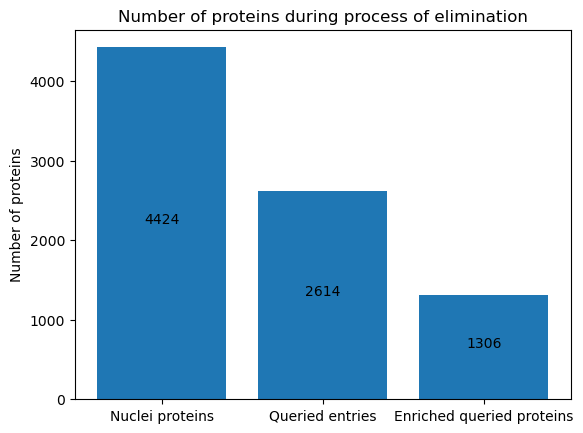

In [15]:
#create plot visualizing the reduction of proteins by criteria (if existing, if enriched)
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')


x_axis = ['Nuclei proteins', 'Queried entries', 'Enriched queried proteins']
y_values = [counter_nuclei_proteome, counter_exist, counter_enriched]

plt.bar(x_axis, y_values)
addlabels(x_axis, y_values)
plt.title("Number of proteins during process of elimination")

plt.ylabel("Number of proteins")    
    


In [5]:
excel_file_enriched = ("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorizing_proteomic_data.xlsx")


#create function to append excel sheet
def append_to_excel(fpath, df, sheet_name):
    #mode a --> append to existing sheet
    with pd.ExcelWriter(fpath, mode="a", engine = 'openpyxl') as f:
        df.to_excel(f, sheet_name=sheet_name)


#create function to append excel sheet
def search_entries_for_localization(excel_and_sheetname, path, sheetname_table):
    entries_for_searching = []
    for entry in excel_and_sheetname['Accession']:
        entries_for_searching.append(entry) 
    

    #create empty lists to store localized/non_localized entry_numbers
    non_localized_proteins = []
    ER_Proteins = []
    Nucleus_proteins = []
    Cytoplasm_proteins = []
    Mitochondria_proteins = []    

    #sort proteins according to localization
    for key in json_loaded["results"]:
        if key['primaryAccession'] in entries_for_searching:  #check if key is in entry list
            try:
                for database in key['uniProtKBCrossReferences']:            #check database entries for Go_numbers

                    if database['database'] != 'GO':
                        continue 
                    elif database['id'] == 'GO:0005737':
                        Cytoplasm_proteins.append(key['primaryAccession'])
                    elif database['id'] == 'GO:0005634': 
                        Nucleus_proteins.append(key['primaryAccession'])
                    elif  database['id'] == 'GO:0005783':
                        ER_Proteins.append(key['primaryAccession'])
                    elif database['id'] == 'GO:0005739':
                        Mitochondria_proteins.append(key['primaryAccession']) 
                    
                    

            except KeyError:
                non_localized_proteins.append(key['primaryAccession'])
    
    #create list containing proteins localized
    localized_proteins = ER_Proteins + Mitochondria_proteins + Nucleus_proteins + Cytoplasm_proteins

    #loop to check if protein is localized in wanted organelles 
    for entry in entries_for_searching:
        if entry in localized_proteins:
            continue
        else:
            non_localized_proteins.append(key['primaryAccession'])
    
    #read excel table containing the proteomic data 
    excel_table = pd.read_excel(path, sheetname_table)
    excel_accession = excel_table.loc[:,"Accession" ]

    #get indexes of localized proteins
    localized_nuc = []
    localized_mito = []
    localized_cyto = []
    localized_ER = []
    non_localized = []
    for index, accession_number in enumerate(excel_accession):
        if accession_number in Nucleus_proteins:
            localized_nuc.append(index)
        if accession_number in Mitochondria_proteins:
            localized_mito.append(index)
        if accession_number in Cytoplasm_proteins:
            localized_cyto.append(index)
        if accession_number in ER_Proteins:
            localized_ER.append(index)

    #create list to check if protein is localized or not 
    total_proteins = localized_cyto + localized_ER + localized_mito + localized_nuc
    
    #loop to create list containing localized/nonlocalized proteins
    for index, accession_number in enumerate(excel_accession):
        if index not in total_proteins:
            non_localized.append(index)

    ##save lists containing the categorized proteins 
    #nuclei proteins 
    table_localized_nuclei = pd.read_excel(path, sheetname_table)

    for index_iteration, row in table_localized_nuclei.iterrows():
        if index_iteration in localized_nuc:
            continue 
        else: 
            table_localized_nuclei = table_localized_nuclei.drop(index = index_iteration)

    file_path = ("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/" + sheetname_table + ".xlsx")
    table_localized_nuclei.to_excel(file_path, sheet_name = "nuclei")
    

    #cytoplasm
    table_localized_cyto = pd.read_excel(path, sheetname_table)

    for index_iteration, row in table_localized_cyto.iterrows():
        if index_iteration in localized_cyto:
            continue  
        else: 
            table_localized_cyto = table_localized_cyto.drop(index = index_iteration)
    
    append_to_excel(file_path, table_localized_cyto, sheet_name= "cyto")

    #mitochondria
    table_localized_mito = pd.read_excel(path, sheetname_table)

    for index_iteration, row in table_localized_mito.iterrows():
        if index_iteration in localized_mito:
            continue
        else:
            table_localized_mito = table_localized_mito.drop(index = index_iteration)

    append_to_excel(file_path, table_localized_mito, sheet_name = "mitochondria")
    
    #ER proteins 

    table_localized_ER = pd.read_excel(path, sheetname_table)

    for index_iteration, row in table_localized_ER.iterrows():
        if index_iteration in localized_ER:
            continue 
        else:
            table_localized_ER = table_localized_ER.drop(index = index_iteration)
    append_to_excel(file_path, table_localized_ER, sheet_name="ER")

    #non_localized_proteins 
    table_nonlocalized = pd.read_excel(path, sheetname_table)

    for index_iteration, row in table_nonlocalized.iterrows():
        if index_iteration in non_localized:
            continue
        else:
            table_nonlocalized = table_nonlocalized.drop(index= index_iteration)
    append_to_excel(file_path, table_nonlocalized, sheet_name="non_localized")




In [7]:
search_entries_for_localization(entries_enriched, excel_file_enriched, "Top30")
search_entries_for_localization(entries_enriched, excel_file_enriched, "Middle 30")
search_entries_for_localization(entries_enriched, excel_file_enriched, "Bottom30")

In [3]:
#code for blasting using API
from Bio.Blast import NCBIWWW
import time                            
from tqdm import tqdm   #track progress
import os.path
from os import path
import signal 

class TimeoutException(Exception):   # Custom exception class
    pass

def timeout_handler(signum, frame):   # Custom signal handler
    raise TimeoutException

# Change the behavior of SIGALRM
signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

In [4]:
#blast categorized proteins 

def blast_non_localized_proteins(document, sheet, percentage):
    #read xlsx file
    excel_sheet = pd.read_excel(document, sheet)
    #get Accession_numbers
    accession_excel_sheet = excel_sheet.loc[:, 'Accession']
    #convert into list
    nonlocalized_accession = []
    for entry in accession_excel_sheet:
        nonlocalized_accession.append(entry)
    #query list with json file and append 
    queried_sequence = []
    queried_accession = []
    for entry in json_loaded['results']:
        if entry['primaryAccession'] in nonlocalized_accession:
            queried_accession.append(entry['primaryAccession'])
            queried_sequence.append(entry['sequence']['value'])
    
    #create empty list 
    protein_data = []
    #for loop to create json file from original json, using accession number and sequence 
    for name, sequence in zip(queried_accession, queried_sequence):
        protein_data.append({"Accession_number": name, "Sequence": sequence})

    #create new folder for saving blast files 
    blast_save_path = '/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Blast_result_categorized/' + percentage + "_" + sheet 
    if not os.path.exists(blast_save_path):                         #check if exists
        os.makedirs(blast_save_path)                                #create folder 
    print(blast_save_path)

    ##blast sequences and save as text files
    counter_blast = 0
    for entry in tqdm(protein_data):
        signal.alarm(900)       
        counter_blast += 1
        try:                                #try function tests block of code (blast function)
            if path.exists(blast_save_path + "/" + entry['Accession_number']):             #condition to check if document already available, if so script continues with next sequence 
                print(counter_blast)
                continue
            else:                                                                     #else function to continue if file doesnt exist 
                results_handle = NCBIWWW.qblast("blastp", "nr", sequence = entry['Sequence'], format_type="Text",           #function to actually query the sequences
                matrix_name='BLOSUM62',
                word_size=5,
                expect=10,
                gapcosts='11 1',
                hitlist_size=30,
                entrez_query="Brachydanio rerio[Organism]",
    
                )
                with open(blast_save_path +  "/" + entry['Accession_number'], "w") as save_file:                                  #function to save data and name it according to the fitting accession number
                    blast_results = results_handle.read() 
                    save_file.write(blast_results)


        except TimeoutException:                #exception handles error if longer than 15 min
            continue # continue the for loop if function A takes more than 15 min 

        else:
        # Reset the alarm
            signal.alarm(0)
        
        time.sleep(20)  

In [5]:
Top30top30 = "/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx"
blast_non_localized_proteins(top30, "non_localized", "")


/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Blast_result_categorized/Top30_non_localized


100%|██████████| 257/257 [00:00<00:00, 13666.73it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257


In [6]:
middle30 = "/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx"
blast_non_localized_proteins(middle30, "non_localized", "Middle 30")

/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Blast_result_categorized/Middle 30_non_localized


100%|██████████| 250/250 [00:00<00:00, 11446.84it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


In [9]:
bottom30 = "/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx"
blast_non_localized_proteins(bottom30, "non_localized", "Bottom30")

/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Blast_result_categorized/Bottom30_non_localized


100%|██████████| 259/259 [00:00<00:00, 87500.99it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


In [8]:
#counting number of proteins in each previously chosen category
#top30 nuclei
entries_top30_nuc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx",  "nuclei")
counter_nuclei_top30 = 0 
for entry in entries_top30_nuc.loc[:,'Accession']:
    counter_nuclei_top30 += 1
print("nuclei_top30", counter_nuclei_top30)

#top30 cyto 
entries_top30_cyto = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx",  "cyto")
counter_cyto_top30 = 0 
for entry in entries_top30_cyto.loc[:,'Accession']:
    counter_cyto_top30 += 1
print("cyto_top30", counter_cyto_top30)

#top30 mitochondria 
entries_top30_mito = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx",  "mitochondria")
counter_mito_top30 = 0 
for entry in entries_top30_mito.loc[:,'Accession']:
    counter_mito_top30 += 1
print('Mito_top30', counter_mito_top30)

#top30 ER
entries_top30_ER = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx",  "ER")
counter_ER_top30 = 0 
for entry in entries_top30_ER.loc[:,'Accession']:
    counter_ER_top30 += 1
print('ER_Top30', counter_ER_top30)

#top30 non_loc
entries_top30_non_loc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Top30.xlsx",  "non_localized")
counter_non_loc_top30 = 0 
for entry in entries_top30_non_loc.loc[:,'Accession']:
    counter_non_loc_top30 += 1
print('Non_localized_top30', counter_non_loc_top30)

#mid30 nuclei
entries_mid30_nuc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx",  "nuclei")
counter_nuclei_mid30 = 0 
for entry in entries_mid30_nuc.loc[:,'Accession']:
    counter_nuclei_mid30 += 1
print('nuclei_mid30', counter_nuclei_mid30)

#mid30 cyto 
entries_mid30_cyto = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx",  "cyto")
counter_cyto_mid30 = 0 
for entry in entries_mid30_cyto.loc[:,'Accession']:
    counter_cyto_mid30 += 1
print('Cyto_mid30', counter_cyto_mid30)

#mid30 mitochondria 
entries_mid30_mito = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx",  "mitochondria")
counter_mito_mid30 = 0 
for entry in entries_mid30_mito.loc[:,'Accession']:
    counter_mito_mid30 += 1
print('Mito_mid30', counter_mito_mid30)

#mid30 ER
entries_mid30_ER = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx",  "ER")
counter_ER_mid30 = 0 
for entry in entries_mid30_ER.loc[:,'Accession']:
    counter_ER_mid30 += 1
print('Mito_mid30', counter_ER_mid30)

#mid30 non_loc
entries_mid30_non_loc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Middle 30.xlsx",  "non_localized")
counter_non_loc_mid30 = 0 
for entry in entries_mid30_non_loc.loc[:,'Accession']:
    counter_non_loc_mid30 += 1
print('Non_loca_mid30', counter_non_loc_mid30)


#bottom 30


#bot30 nuclei
entries_bot30_nuc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx",  "nuclei")
counter_nuclei_bot30 = 0 
for entry in entries_bot30_nuc.loc[:,'Accession']:
    counter_nuclei_bot30 += 1
print(counter_nuclei_bot30)

#bot30 cyto 
entries_bot30_cyto = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx",  "cyto")
counter_cyto_bot30 = 0 
for entry in entries_bot30_cyto.loc[:,'Accession']:
    counter_cyto_bot30 += 1
print(counter_cyto_bot30)

#bot30 mitochondria 
entries_bot30_mito = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx",  "mitochondria")
counter_mito_bot30 = 0 
for entry in entries_bot30_mito.loc[:,'Accession']:
    counter_mito_bot30 += 1
print(counter_mito_bot30)

#mid30 ER
entries_bot30_ER = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx",  "ER")
counter_ER_bot30 = 0 
for entry in entries_bot30_ER.loc[:,'Accession']:
    counter_ER_bot30 += 1
print(counter_ER_bot30)

#mid30 non_loc
entries_bot30_non_loc = pd.read_excel("/Users/tim/Desktop/Important stuff/Universität/Master/4th Semester/Research Lab/Proteomic data/Excel/Categorized proteins/Bottom30.xlsx",  "non_localized")
counter_non_loc_bot30 = 0 
for entry in entries_bot30_non_loc.loc[:,'Accession']:
    counter_non_loc_bot30 += 1
print(counter_non_loc_bot30)



    


    


nuclei_top30 99
cyto_top30 66
Mito_top30 25
ER_Top30 6
Non_localized_top30 263
nuclei_mid30 108
Cyto_mid30 79
Mito_mid30 23
Mito_mid30 12
Non_loca_mid30 255
86
74
53
10
250


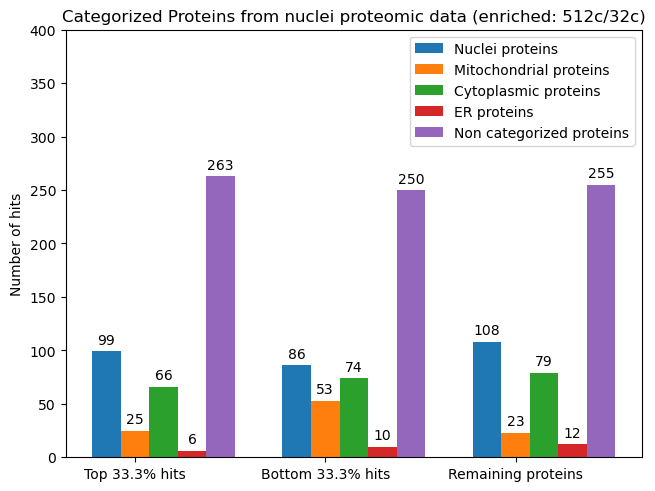

In [9]:
#create a grouped bar plot and 

Nuclei = (counter_nuclei_top30, counter_nuclei_bot30, counter_nuclei_mid30)
cytoplasm = (counter_cyto_top30, counter_cyto_bot30, counter_cyto_mid30)
mitochondria = (counter_mito_top30, counter_mito_bot30, counter_mito_mid30 )
ER_prot = (counter_ER_top30, counter_ER_bot30 ,counter_ER_mid30 )
non_localized = (counter_non_loc_top30, counter_non_loc_bot30, counter_non_loc_mid30)



#create label 
Percentage_hits = ("Top 33.3% hits", "Bottom 33.3% hits", "Remaining proteins")
localization = {
    "Nuclei proteins": (Nuclei),
    "Mitochondrial proteins": (mitochondria),
    "Cytoplasmic proteins": (cytoplasm),
    "ER proteins": (ER_prot),
    "Non categorized proteins": (non_localized)
    
 

}

x = np.arange(len(Percentage_hits)) # label the locations
width = 0.15
multiplier = 0
fig, ax = plt.subplots(layout='constrained', )

for attribute, measurement in localization.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of hits')
ax.set_title('Categorized Proteins from nuclei proteomic data (enriched: 512c/32c)')
ax.set_xticks(x + width, Percentage_hits)

ax.set_ylim(0, 400)
ax.legend()
plt.show()


